# Navigation

---

In this notebook, we train an agent to sucessfully navigate the `Bananas` Unity ML-Agents environment.

This repository was developed and meets the specifications of the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
max_iter = 100
i = 0
while True:
    action = np.random.randint(action_size)        # select an action
    print("action:", action)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    print("state:", next_state)
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done or i >= max_iter :                                       # exit loop if episode finished
        break
    i += 1
print("Score: {}".format(score))

action: 1
state: [ 0.          1.          0.          0.          0.17788731  0.
  1.          0.          0.          0.21135208  1.          0.
  0.          0.          0.3379637   0.          1.          0.
  0.          0.15728076  1.          0.          0.          0.
  0.58536041  0.          1.          0.          0.          0.16940029
  0.          1.          0.          0.          0.33455756  0.
 -7.81049395]
action: 0
state: [0.         1.         0.         0.         0.17886539 0.
 1.         0.         0.         0.21251413 1.         0.
 0.         0.         0.33721545 0.         1.         0.
 0.         0.15814552 1.         0.         0.         0.
 0.5851512  0.         1.         0.         0.         0.17033167
 0.         1.         0.         0.         0.33639702 0.
 3.39042234]
action: 3
state: [ 0.          1.          0.          0.          0.28879625  0.
  1.          0.          0.          0.15645786  0.          0.
  0.          1.          0.    

state: [ 0.          1.          0.          0.          0.74283636  0.
  1.          0.          0.          0.38781002  0.          1.
  0.          0.          0.08142341  0.          1.          0.
  0.          0.46936664  0.          1.          0.          0.
  0.09614135  0.          1.          0.          0.          0.39751294
  0.          1.          0.          0.          0.15215668  2.13996673
 -3.75690389]
action: 3
state: [ 1.          0.          0.          0.          0.35777321  0.
  1.          0.          0.          0.4194091   0.          1.
  0.          0.          0.10823704  0.          1.          0.
  0.          0.878609    0.          1.          0.          0.
  0.1878711   0.          1.          0.          0.          0.50618768
  0.          1.          0.          0.          0.39912528  2.56286311
 -1.49964499]
action: 1
state: [ 1.          0.          0.          0.          0.35192508  0.
  1.          0.          0.          0.43201217  0.  

state: [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.67778808e-01  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.17104572e-01  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  3.43551040e-01  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.19214106e-01
  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
  4.05650407e-01  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.42500985e-01  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  6.41995490e-01 -1.19209290e-07
  3.89142990e+00]
action: 3
state: [ 1.          0.          0.          0.          0.59282732  0.
  0.          1.          0.          0.91206086  0.          1.
  0.          0.          0.43009987  1.          0.          0.
  0.          0.36999634  0.          1.          0.          0.
  0.74653906  0.          0.          0.          1.          0.
  1.          0.          0.          0.        

state: [ 0.          1.          0.          0.          0.06243284  0.
  1.          0.          0.          0.20191739  0.          0.
  0.          1.          0.          0.          1.          0.
  0.          0.07002752  0.          0.          0.          1.
  0.          0.          1.          0.          0.          0.10134669
  1.          0.          0.          0.          0.5821296  -2.61195087
  1.50801516]
action: 0
state: [ 0.          1.          0.          0.          0.06249848  0.
  1.          0.          0.          0.20212971  0.          0.
  0.          1.          0.          0.          1.          0.
  0.          0.07010116  0.          0.          0.          1.
  0.          0.          1.          0.          0.          0.10145326
  1.          0.          0.          0.          0.57035929 -1.25348687
  7.46195269]
action: 1
state: [ 0.          1.          0.          0.          0.06384636  0.
  1.          0.          0.          0.20648891  0.  

state: [1.         0.         0.         0.         0.51945424 0.
 0.         0.         1.         0.         0.         1.
 0.         0.         0.52425361 0.         0.         0.
 1.         0.         0.         1.         0.         0.
 0.90996534 1.         0.         0.         0.         0.9589572
 1.         0.         0.         0.         0.32227328 1.27326238
 3.62486482]
action: 0
state: [1.         0.         0.         0.         0.52954167 0.
 0.         0.         1.         0.         0.         1.
 0.         0.         0.53166693 0.         0.         0.
 1.         0.         1.         0.         0.         0.
 0.42628121 1.         0.         0.         0.         0.94739443
 1.         0.         0.         0.         0.30817902 0.53410816
 8.17720509]
action: 2
state: [1.         0.         0.         0.         0.2795791  1.
 0.         0.         0.         0.33086288 0.         1.
 0.         0.         0.42667949 0.         0.         0.
 1.         0.   

state: [0.         0.         0.         1.         0.         0.
 1.         0.         0.         0.5816685  0.         1.
 0.         0.         0.41978115 1.         0.         0.
 0.         0.17734094 0.         1.         0.         0.
 0.3897478  1.         0.         0.         0.         0.68242586
 0.         1.         0.         0.         0.44081101 1.11573219
 7.73015499]
action: 3
state: [ 0.          0.          0.          1.          0.          0.
  0.          1.          0.          0.63458264  0.          1.
  0.          0.          0.38791665  0.          0.          1.
  0.          0.5776208   0.          1.          0.          0.
  0.45803535  1.          0.          0.          0.          0.16798787
  1.          0.          0.          0.          0.28225854 -1.30465126
  3.26402402]
Score: 0.0


When finished, you can close the environment.

In [ ]:
#Don't close the environment if you're going to train it with the cells below
#env.close()

### 4. Training!

To train the agent we import and create an instance of the Agent class from `dqn_agent.py`
Then, we create the dqn function that will perform the necessary steps to train the agent using the Deep Q-Learning algorithm with Experience Replay.

The Agent uses a window of the five last states as an input to decide which action to take next.

The training will stop when the agent successfully resolves the environment with a score of 15 or more in at least 100 consecutive episodes.

In [6]:
# import torch

from dqn_agent import Agent
from collections import deque

agent = Agent(state_size=state_size, action_size=action_size, seed=0)


In [8]:
def dqn(n_episodes=1000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # Keep the last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # restart the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(np.int32(action))[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # check if episode has finished

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}-eps:{}\tAverage Score: {:.2f}'.format(i_episode, eps, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}-eps:{}\tAverage Score: {:.2f}'.format(i_episode, eps, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()


Episode 100-eps:0.6057704364907278	Average Score: 0.58
Episode 200-eps:0.3669578217261671	Average Score: 1.324
Episode 300-eps:0.22229219984074702	Average Score: 3.57
Episode 400-eps:0.1346580429260134	Average Score: 6.223
Episode 500-eps:0.08157186144027828	Average Score: 9.34
Episode 600-eps:0.0494138221100385	Average Score: 12.4780
Episode 679-eps:0.03325613897196732	Average Score: 15.046
Environment solved in 579 episodes!	Average Score: 15.04


### 5. Plot the training scores

Here we plot how the scores evolved during the training. Although the lines might seem random, there must be a clear upward trend in the scores of a well trained agent (like here).

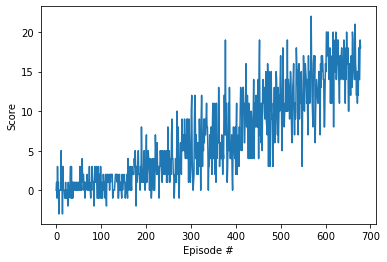

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


### 6. See the Smart Agent collection the yellow bananas!

Here we let the agent collect bananas for 1000 steps and print the score at the end.

In [10]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
max_iter = 1000
i = 0
while True:
    action = agent.act(state, 0)
    #print("action:", action)
    env_info = env.step(np.int32(action))[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    #agent.step(state, action, reward, next_state, done)
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done or i >= max_iter :                                       # exit loop if episode finished
        break
    i += 1
    
print("Score: {}".format(score))
        


Score: 12.0


In [11]:
env.close()